<a href="https://colab.research.google.com/github/Andres-Gress/Simulacion-I/blob/main/PruebaDePromedios_Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">PRUEBA DE LOS PROMEDIOS</font>

Código que implementa la Prueba de los Promedios para números aleatorios.

Aplica una prueba de hipótesis para saber si un conjunto de datos provienen de una distribución uniforme $U(0,1)$

Tenemos $U_i \sim U(0,1) \quad$ para $\quad i = 0,1,2,...,N$

A partir de la distribución uniforme con $a=0, b=1$

Por definición $\mu=\frac{1}{2} \quad $ y  $ \quad \sigma^2=\frac{1}{12} \quad ⇒ \quad \sigma = \frac{1}{\sqrt{12}}$

A partir de lo anterior se puede asegurar que la media de un conjunto aleatorio de datos con distribución uniforme $U(0,1)$ es $\frac{1}{2}$

Para ello se realiza una prueba de hipótesis donde

$H_0:\mu=\frac{1}{2}$

$H_a: \mu \neq \frac{1}{2}$

Se tiene el estadísticó de prueba:

$Z_0=\frac{(\bar{X}-\frac{1}{2})\sqrt{N}}{\sqrt{\frac{1}{12}}}$

$\bar{X}$ es la media de los datos (Promedio)

$\bar{X}=\frac{U_1 + U_2 + ... + U_N}{N} = 0.4826878$

Y el estadístico se define de la forma:

$Z_0=\frac{(\bar{X}-\frac{1}{2})\sqrt{N}}{\sqrt{\frac{1}{12}}}$

$N$ es el número total de datos

$Z_0=\frac{(0.4826878-0.5)10}{\frac{1}{\sqrt{12}}}=-0.5997121998158783$

Posteriormente se toma un nivel de confianza $\alpha$

Un valor común es $\alpha=0.05$

Que los puntos críticos son: $\pm 1.96$

Y es notorio que $Z_0$ se encuentra dentro del intervalo $[-1.96,1.96]$ lo que significa que cae en la región de aceptación de $H_0$ por lo que la decisión es no rechazar $H_0$

Por lo que se concluye que los datos provienen de una distribución Uniforme $\quad U(0,1)$

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

Se importan las librerias:

*   numpy para calcular la media
*   scipy.stats para los cálculos estadisticos (estadistico)
*   Pandas para extraer datos de un sitio web (Github)

In [2]:
url = 'https://raw.githubusercontent.com/Andres-Gress/Simulacion-I/refs/heads/main/datos.txt' #Url de github en raw para llamarlo posteriormente

datos = pd.read_csv(url, header=None) #Obtiene los archivos del URL y se indica que no hay encabezados
datos = datos.dropna(axis=1, how='all')  #Elimina columnas de NaN que se generan por default
datos

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.78961,0.0523,0.10639,0.55877,0.14151,0.76086,0.12079,0.27738,0.65726,0.79269,...,0.19147,0.40644,0.08128,0.73435,0.22724,0.22287,0.07281,0.64183,0.44267,0.72102


Conjunto de 100 números extraídos de github con la librería pandas, por default lanza una sexta columna con NaN, que se debe quitar, sino afectará al número de datos que contiene la tabla

In [3]:
def prueba_promedio(datos,a):
  N=datos.size #Se pone ahora datos.size para que cuente todos los elementos de la tabla y no solo las filas
  u= np.mean(datos) #Media de los datos
  Z0=(u-0.5)*np.sqrt(N)*np.sqrt(12) #Estadístico de prueba

  z_critico = stats.norm.ppf(1 - a/2) #Puntos críticos

  if Z0 < -z_critico or Z0 > z_critico:
      print("\n Se rechaza H0: La muestra proviene de una distribución U(0,1)")
  else:
      print("\nNo se rechaza H0: La muestra proviene de una distribución U(0,1)")

Función que calcula el estadístico de prueba y lo compara con los puntos críticos, mismos que se obtienen a partir de dar el nivel de significancia $\alpha$, para saber si se encuentra en la región de rechazo de $H_0$ y en su caso correspondiente aceptar o rechazar la hipótesis nula

In [4]:
a=0.05 #a es alpha
prueba_promedio(datos,a)


No se rechaza H0: La muestra proviene de una distribución U(0,1)


Se dió el valor de significancia $\alpha=0.05$, es decir la confianza será de $1-\alpha=1-0.05=0.95 \quad ⇒ \quad 95\%$

Lo que dará como puntos críticos $\pm 1.96$, lo anterior lo calcula la función definida anteriormente y en base a dichos cálculos compara los resultados y se toma la decisión.

Con una confianza del $95\%$ se toma la decisión de NO rechazar $H_0$

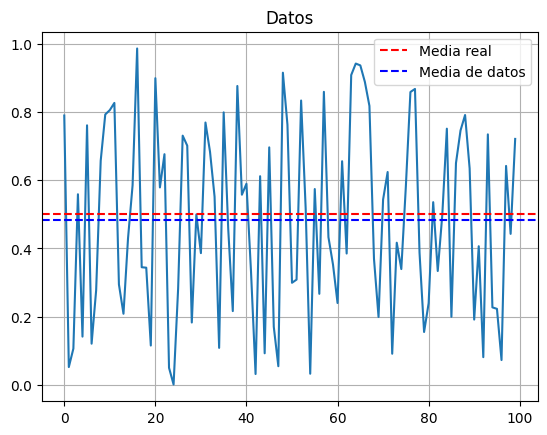

In [5]:
# Convertimos la única fila en un vector para graficar
valores = datos.iloc[0]

plt.plot(range(len(valores)), valores)
plt.axhline(0.5,color="red", linestyle="--", label="Media real")
plt.axhline(np.mean(datos),color="blue", linestyle="--", label="Media de datos")
plt.legend()
plt.title("Datos")
plt.grid(True)
plt.show()

Gráfica de los 100 datos con dos líneas marcando su media real y la de la muestra, ambas son cercanas, lo que demuestra el porqué no se rechaza $H_0$